**Sentiment analysis of Drive to survive reviews (scraped from IMDb website)**

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from scipy.special import softmax
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
#Predicting sentiment
def sentiment_predict(text):
  inputs=tokenizer(text,return_tensors="pt")
  outputs=model(**inputs)
  score=outputs[0][0].detach().numpy()
  score=softmax(score)
  scores={
    "negative":score[0],
    "neutral":score[1],
    "positive":score[2]
}
  return scores

Importing the data from dts_review.csv

In [5]:
review_df=pd.read_csv("dts_review.csv")
review_df.head()

,Title,Review,Rating
0,Not a f1 fan but loved this show!,I've never watched an f1 race and know nothing...,10
1,Made me a Formula 1 Fan,I had never watched an F1 race before. Had no ...,10
2,Binge Worthy,As a female who has never even held a drivers ...,9
3,This is returning F1 to me,Captures all the stuff just outside the headli...,9
4,Very good production indeed,It's so good to watch a F1 show that isn't mai...,10


cleaning the df for analysis

In [6]:
#checking for null values
review_df.isnull().sum()

Title     0
Review    0
Rating    0
dtype: int64

In [7]:
#with no null values in the data frame. we will use the title column and the review column for the analysis
df_analysis=review_df[["Review"]]
df_rating=review_df[["Rating"]]
# df_analysis.head()
# df_rating.head()

In [8]:
results = []
# Iterating over the DataFrame and applying sentiment analysis
for i, row in df_analysis.iterrows():
  text = str(row["Review"])
  if len(text) > 0:
          try:
              sentiment_scores = sentiment_predict(text)
              results.append(sentiment_scores)
          except Exception as e:
              print(f"Error processing row {i}: {e}")
              results.append({"negative": None, "neutral": None, "positive": None})
  else:
          results.append({"negative": None, "neutral": None, "positive": None})


Error processing row 24: index out of range in self


In [9]:
result_df=pd.DataFrame(results)
result_df.head()

,negative,neutral,positive
0,0.029319,0.097195,0.873487
1,0.007951,0.028023,0.964026
2,0.164273,0.418099,0.417627
3,0.005046,0.115854,0.879100
4,0.005345,0.055590,0.939065


Visualization

In [10]:
#getting average positive, neutral and negative scores
average_positive_score=result_df['positive'].mean()
average_neutral_score=result_df['neutral'].mean()
average_negative_score=result_df['negative'].mean()
print(f"Average positive score: {average_positive_score}")
print(f"Average neutral score: {average_neutral_score}")
print(f"Average negative score: {average_negative_score}")

Average positive score: 0.6439284641203378
Average neutral score: 0.16921501632502958
Average negative score: 0.18685652273979778


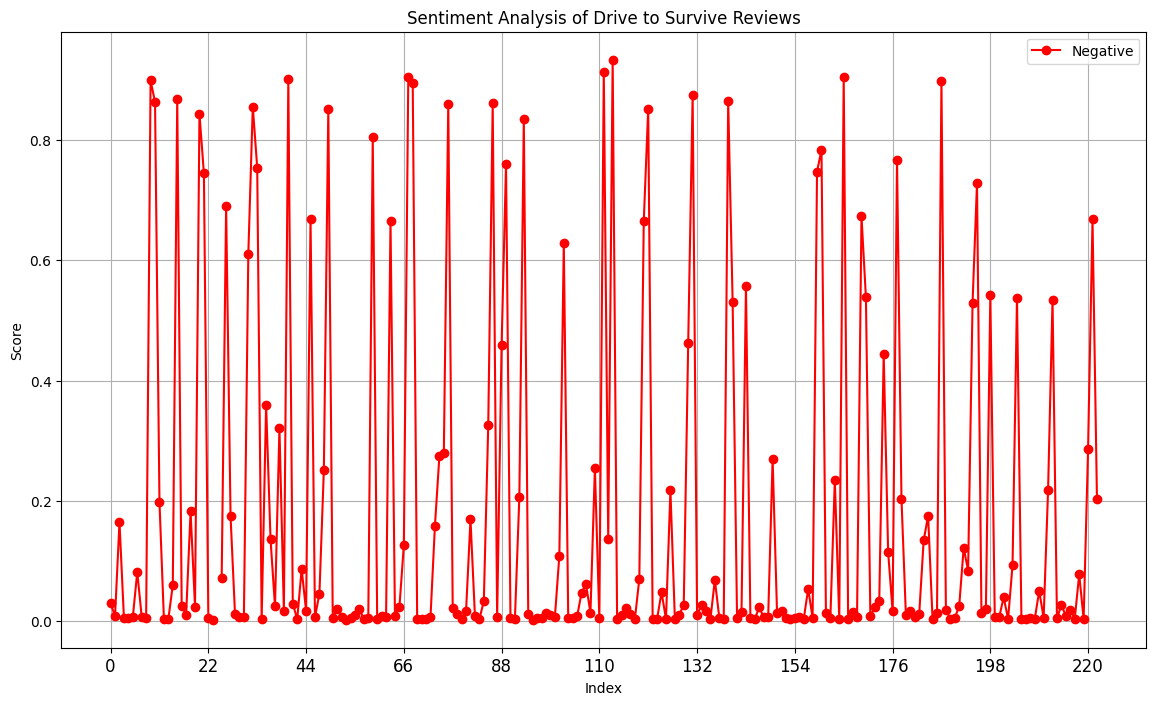

In [11]:
# Plot negative sentiment
plt.figure(figsize=(14,8))
plt.plot(result_df.index, result_df['negative'], label='Negative', color='red', marker='o')
plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Sentiment Analysis of Drive to Survive Reviews')
plt.xticks(ticks=range(0, len(result_df), max(1, len(result_df)//10)), labels=range(0, len(result_df), max(1, len(result_df)//10)), fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

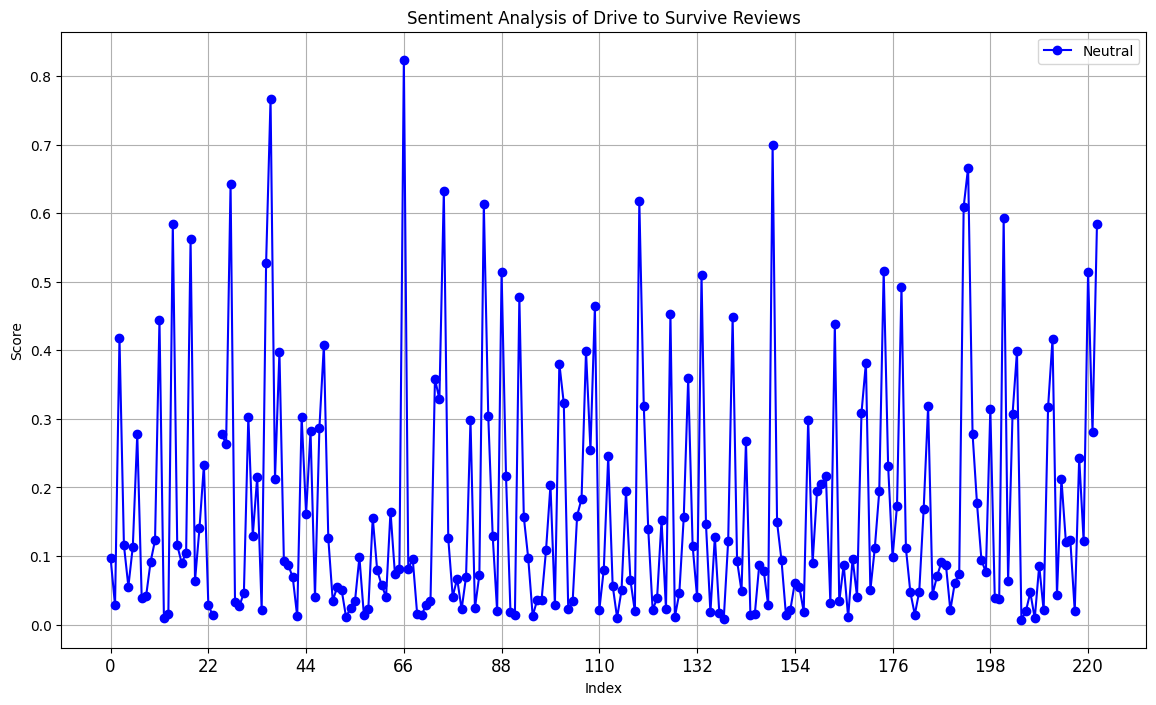

In [12]:
# Plot neutral sentiment
plt.figure(figsize=(14,8))
plt.plot(result_df.index, result_df['neutral'], label='Neutral', color='blue', marker='o')
plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Sentiment Analysis of Drive to Survive Reviews')
plt.xticks(ticks=range(0, len(result_df), max(1, len(result_df)//10)), labels=range(0, len(result_df), max(1, len(result_df)//10)), fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

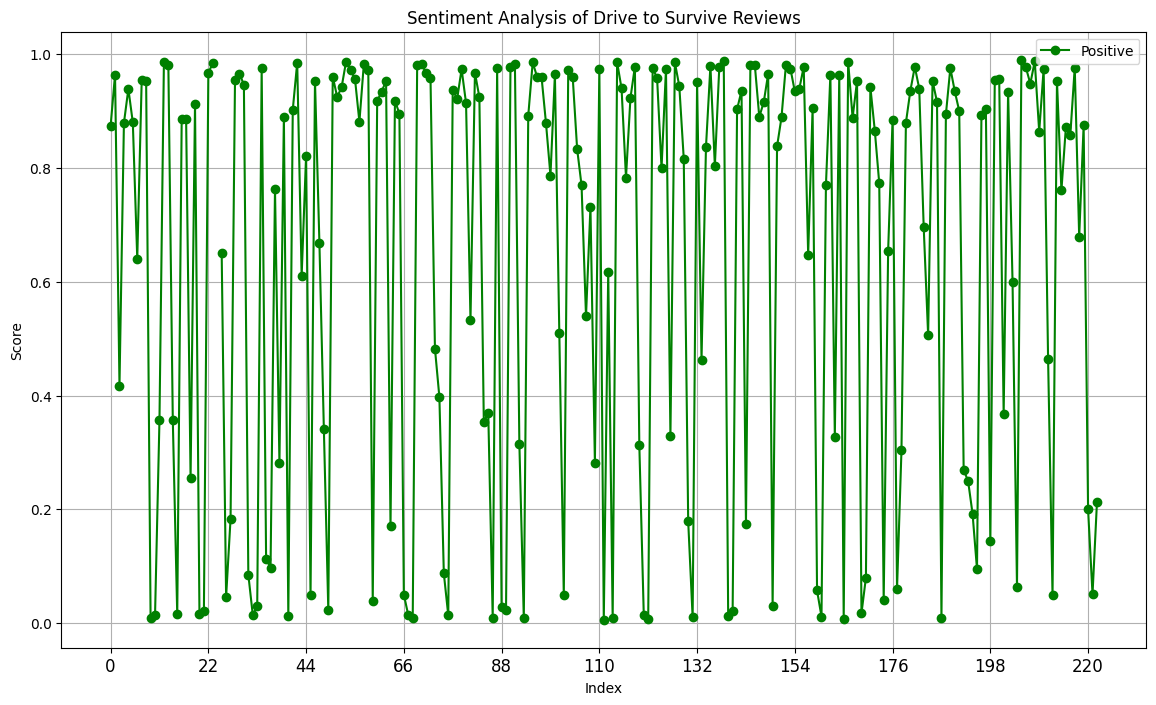

In [13]:
# Plot positive sentiment
plt.figure(figsize=(14,8))
plt.plot(result_df.index, result_df['positive'], label='Positive', color='green', marker='o')
plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Sentiment Analysis of Drive to Survive Reviews')
plt.xticks(ticks=range(0, len(result_df), max(1, len(result_df)//10)), labels=range(0, len(result_df), max(1, len(result_df)//10)), fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Categorize sentiment
result_df['sentiment'] = result_df[['negative', 'neutral', 'positive']].idxmax(axis=1)
# result_df.head()
sentiment_counts = result_df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
positive    152
negative     43
neutral      27
Name: count, dtype: int64


<ipython-input-15-9a1143e7df76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=result_df, palette=['red', 'blue', 'green'])


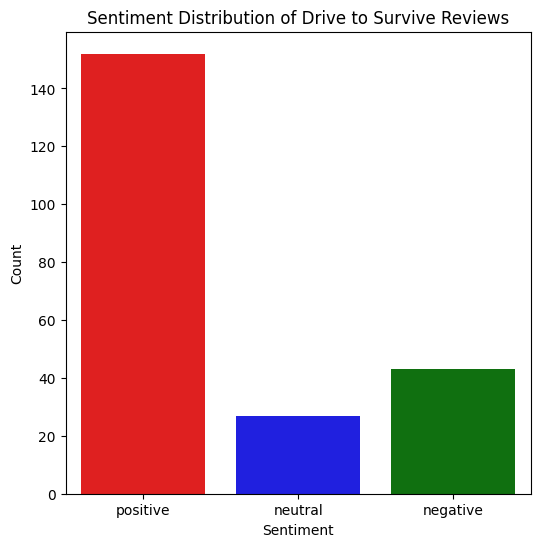

In [15]:
# Plot sentiment distribution
plt.figure(figsize=(6,6))
sns.countplot(x='sentiment', data=result_df, palette=['red', 'blue', 'green'])
plt.title('Sentiment Distribution of Drive to Survive Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [17]:
# creating a word cloud for all positive, neutral and negative revirews to find
# the most commonly used wordes for each type of comment
positive_reviews = df_analysis[result_df['sentiment'] == 'positive']['Review']
neutral_reviews = df_analysis[result_df['sentiment'] == 'neutral']['Review']
negative_reviews = df_analysis[result_df['sentiment'] == 'negative']['Review']

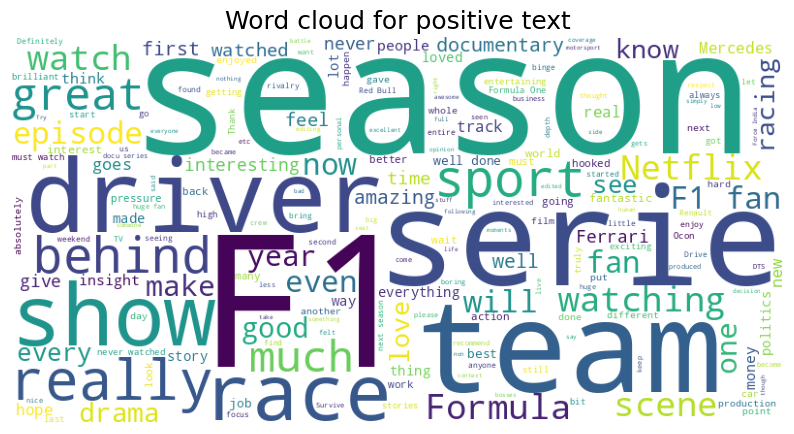

In [28]:
positive_text=" ".join(positive_reviews)
positive_cloud=WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.figure(figsize=(10,7))
plt.imshow(positive_cloud)
plt.axis("off")
plt.title("Word cloud for positive text",fontsize=18)
plt.show()

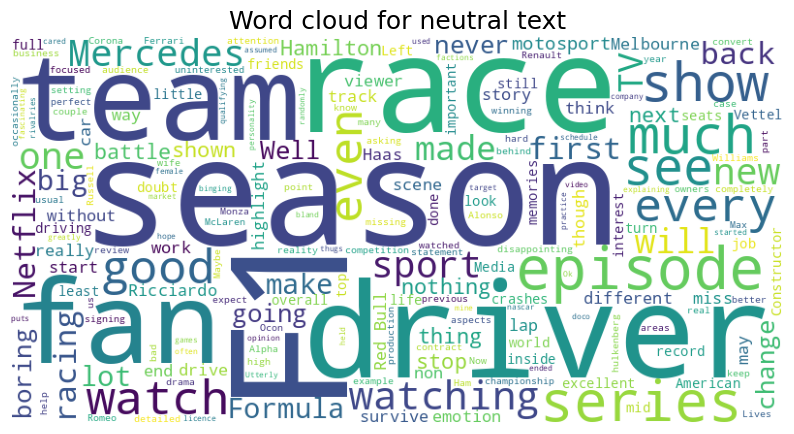

In [29]:
neutral_text=" ".join(neutral_reviews)
neutral_cloud=WordCloud(width=800, height=400, background_color="white").generate(neutral_text)
plt.figure(figsize=(10,7))
plt.imshow(neutral_cloud)
plt.axis("off")
plt.title("Word cloud for neutral text",fontsize=18)
plt.show()

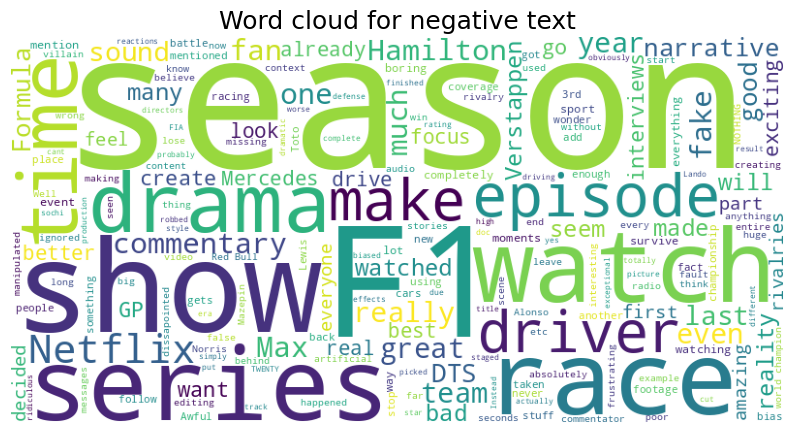

In [30]:
negative_text=" ".join(negative_reviews)
negative_cloud=WordCloud(width=800, height=400, background_color="white").generate(negative_text)
plt.figure(figsize=(10,7))
plt.imshow(negative_cloud)
plt.axis("off")
plt.title("Word cloud for negative text",fontsize=18)
plt.show()

**Summary**


Overall, the majority of reviews for "Drive to Survive" are positive, with a significant difference between the number of positive reviews and neutral or negative reviews. This suggests that a large portion of viewers enjoyed the series. However, the negative and neutral reviews indicate that there are aspects of the show that some viewers did not enjoy.

* Positive Reviews: Approximately 145 reviews
* Neutral Reviews: Approximately 25 reviews
* Negative Reviews: Approximately 45 reviews

* Average Positive Sentiment Score: 0.6439
* Average Neutral Sentiment Score: 0.1692
* Average Negative Sentiment Score: 0.1869

From the word clouds generated, we can see the distribution of words used in the positive, neutral, and negative reviews.

* Common Words Across Sentiments: Words like "F1," "Season," "Race," "Series," "Team," and "Show" are most common.





1.   Positive Sentiment:

        Positive sentiment emphasizes excitement surrounding the show and F1 in general. It focuses on words of excitement and enthusiasm, such as "Great", "Love", "insight", "hooked", and "fantastic."

2.   Neutral Sentiment:

        Neutral sentiment does not show words that represent any strong emotion. However, the word cloud displays names of teams and drivers, such as "Hamilton",  "Mercedes", and "Red Bull." This may indicate comments on the portrayal of these drivers and teams.

3.   Negative Sentiment:

        Negative sentiment contains words such as "bad", "poor", "rivalries", "narrative", and "manipulated", indicating viewers dissatisfaction with the series or some aspects of it.




